In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## data importing

In [2]:
articles=[]
with open('booksummaries.txt','r') as f:
    article = f.readlines()
    articles.append(article)

In [3]:
len(articles[0])

16559

Their are 16,559 book summaries in the file.

## Word Cloud

In [4]:
from nltk import word_tokenize

In [5]:
article1=word_tokenize(articles[0][1])

In [6]:
article1_preprocessed=[]
for item in article1:
    if item.isalnum():
        article1_preprocessed.append(item)

In [7]:
sent = ""
for item in article1_preprocessed:
    sent +=item+" "

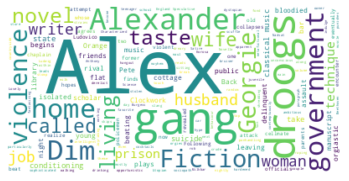

In [8]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt


# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white',stopwords=STOPWORDS).generate(sent)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

## importing booksummaries.xlsx

In [9]:
data = pd.read_excel('booksummaries.xlsx',engine='openpyxl')

In [10]:
data

,Title,Author,Summary
0,Animal Farm,George Orwell,"Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,"Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,The text of The Plague is divided into five p...
3,An Enquiry Concerning Human Understanding,David Hume,The argument of the Enquiry proceeds by a ser...
4,A Fire Upon the Deep,Vernor Vinge,The novel posits that space around the Milky ...
...,...,...,...
95,The Book of the City of Ladies,NaN,Part I opens with Christine reading from Math...
96,The Sentinel,Arthur C. Clarke,The story deals with the discovery of an arti...
97,The Fountains of Paradise,Arthur C. Clarke,"In the 22nd century, Dr Vannevar Morgan is a ..."
98,Lord of the Flies,William Golding,"In the midst of a wartime evacuation, a Briti..."


#  a)Shakespeare works

In [11]:
data[data['Author'] == 'William Shakespeare']

,Title,Author,Summary
43,Hamlet,William Shakespeare,The protagonist of Hamlet is Prince Hamlet of...
51,Macbeth,William Shakespeare,"The play opens amidst thunder and lightning, ..."
59,Othello,William Shakespeare,"The play opens with Roderigo, a rich and diss..."
68,Romeo and Juliet,William Shakespeare,"The play, set in Verona, begins with a street..."


In [12]:
shakespeare_works = [summary for summary in data[data['Author'] == 'William Shakespeare']['Summary']]

In [13]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [14]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

We remove the above stop words from the corpus

In [15]:
words = []
for summary in shakespeare_works:
    raw_words = word_tokenize(summary)
    for item in raw_words:
        if item.isalpha():
            item=item.lower()
            if item not in stop_words:
                words.append(item)

In [16]:
len(words)

2427

In [17]:
from collections import Counter

In [18]:
Counter(words).most_common()[:50]

[('hamlet', 57),
 ('macbeth', 54),
 ('iago', 32),
 ('othello', 32),
 ('cassio', 30),
 ('desdemona', 23),
 ('romeo', 23),
 ('claudius', 21),
 ('macduff', 19),
 ('king', 18),
 ('laertes', 15),
 ('lady', 15),
 ('ghost', 14),
 ('death', 14),
 ('juliet', 14),
 ('witches', 13),
 ('banquo', 13),
 ('prince', 11),
 ('gertrude', 11),
 ('father', 11),
 ('polonius', 11),
 ('ophelia', 11),
 ('two', 11),
 ('kill', 11),
 ('duncan', 11),
 ('capulet', 11),
 ('night', 10),
 ('murder', 10),
 ('arrives', 10),
 ('roderigo', 10),
 ('tells', 9),
 ('paris', 9),
 ('castle', 8),
 ('horatio', 8),
 ('england', 8),
 ('poisoned', 8),
 ('thane', 8),
 ('emilia', 8),
 ('son', 7),
 ('wife', 7),
 ('one', 7),
 ('dead', 7),
 ('prophecy', 7),
 ('malcolm', 7),
 ('brabantio', 7),
 ('handkerchief', 7),
 ('enters', 6),
 ('however', 6),
 ('play', 6),
 ('scene', 6)]

The top 50 words occuring in the corpus with their respective counts.

# b)K-Means Clustering

#### A Tf-ifd word-frequency array

We will create word frequency array for the summary documents.For this , we will use TfidfVectorizer from sklearn.It transform a list of documents into a word frequency array, which it outputs as a csr_matric,

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
documents=[]
for items in data.Summary:
    documents.append(items)

In [21]:
documents

[' Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, \'Beasts of England\'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a philosophy. The animals revolt and drive the drunken and irresponsible Mr Jones from the farm, renaming it "Animal Farm". They adopt Seven Commandments of Animal-ism, the most important of which is, "All animals are equal". Snowball attempts to teach the animals reading and writing; food is plentiful, and the farm runs smoothly. The pigs elevate themselves to positions of leadership and set aside special food items, ostensibly for their personal health. Napoleon takes the pups from the farm dogs and trains them privately. Napoleon and Snowball struggle for leadership. When Snowball announces his plans to build a windmill, Napoleon has his dogs chase Snowball away and declares himself leader. 

In [22]:
tfidf=TfidfVectorizer()

csr_mat = tfidf.fit_transform(documents)

In [24]:
print(csr_mat.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

['00', '000', '10', '100', '1000', '108', '11', '12', '120', '13', '14', '15', '16', '1600', '1698', '16a', '16b', '17', '1757', '1761', '1799', '18', '1806', '1807', '1824', '1835', '1845', '1851', '1853', '1860s', '1861', '1863', '1864', '1865', '1869', '1873', '1877', '1880', '1883', '19', '1941', '1942', '1947', '1953', '1959', '1961', '1962', '1965', '1970s', '1971', '1974', '1976', '1979', '1980s', '1987', '1990s', '1997', '1998', '19th', '20', '2001', '2009', '200th', '2010', '2011', '204', '2077', '20th', '21', '2130', '217', '21st', '22', '2248', '22nd', '23', '24', '25', '26', '27', '2702', '28', '2850', '29', '30', '300', '31', '317', '319', '32', '320', '321', '322', '324', '328', '330', '332', '34', '340', '346', '348', '35', '353', '354', '355', '356', '359', '360', '361', '362', '38', '384', '385', '389', '390', '391', '392', '393', '398', '3jane', '40', '400', '402', '408', '41', '412', '414', '42', '425', '426', '439', '44', '49', '493', '50', '500', '500m', '550', '58

In [26]:
csr_mat.toarray().shape

(100, 11581)

In [27]:
idf_score = tfidf.idf_ 
feature = tfidf.get_feature_names()

In [83]:
feature

['00',
 '000',
 '10',
 '100',
 '1000',
 '108',
 '11',
 '12',
 '120',
 '13',
 '14',
 '15',
 '16',
 '1600',
 '1698',
 '16a',
 '16b',
 '17',
 '1757',
 '1761',
 '1799',
 '18',
 '1806',
 '1807',
 '1824',
 '1835',
 '1845',
 '1851',
 '1853',
 '1860s',
 '1861',
 '1863',
 '1864',
 '1865',
 '1869',
 '1873',
 '1877',
 '1880',
 '1883',
 '19',
 '1941',
 '1942',
 '1947',
 '1953',
 '1959',
 '1961',
 '1962',
 '1965',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1979',
 '1980s',
 '1987',
 '1990s',
 '1997',
 '1998',
 '19th',
 '20',
 '2001',
 '2009',
 '200th',
 '2010',
 '2011',
 '204',
 '2077',
 '20th',
 '21',
 '2130',
 '217',
 '21st',
 '22',
 '2248',
 '22nd',
 '23',
 '24',
 '25',
 '26',
 '27',
 '2702',
 '28',
 '2850',
 '29',
 '30',
 '300',
 '31',
 '317',
 '319',
 '32',
 '320',
 '321',
 '322',
 '324',
 '328',
 '330',
 '332',
 '34',
 '340',
 '346',
 '348',
 '35',
 '353',
 '354',
 '355',
 '356',
 '359',
 '360',
 '361',
 '362',
 '38',
 '384',
 '385',
 '389',
 '390',
 '391',
 '392',
 '393',
 '398',
 '3jane',
 '40'

In [28]:
idf_score

array([4.92197334, 3.66921037, 3.31253542, ..., 4.92197334, 4.92197334,
       4.92197334])

### k-means clustering after using feature decomposition TruncatedSVD

In [29]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=100)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6,random_state=7)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

In [30]:
# Fit the pipeline to articles
pipeline.fit(csr_mat)

# Calculate the cluster labels: labels
labels = pipeline.predict(csr_mat)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'Title': data.Title})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                      Title
27      0                Don Quixote
57      0                    No Logo
29      0               Dune Messiah
30      0    Darwin's Dangerous Idea
31      0            Death of a Hero
..    ...                        ...
53      5   Moby-Dick; or, The Whale
68      5           Romeo and Juliet
70      5                  Ringworld
36      5        Farmer Giles of Ham
99      5  Through the Looking-Glass

[100 rows x 2 columns]


In [31]:
df.label.value_counts()

0    35
5    24
4    24
1    12
3     3
2     2
Name: label, dtype: int64

### K-means clustering directly of dataset  

In [32]:
clusters_model=[]
inertia_val=[]

for cluster in range(2,20):
    # Creating a KMeans instance: kmeans
    kmeans = KMeans(n_clusters = cluster,random_state=7)
    kmeans.fit(csr_mat)
    # Calculate the cluster labels: labels
    labels = kmeans.predict(csr_mat)
    inertia_val.append(kmeans.inertia_)
    #print(cluster)
    clusters_model.append(kmeans)
    # Create a DataFrame aligning labels and titles: df
    df = pd.DataFrame({'label': labels, 'Title': data.Title})

    # Display df sorted by cluster label
    #print(df.sort_values('label'))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [33]:
clusters_model

[KMeans(n_clusters=2, random_state=7),
 KMeans(n_clusters=3, random_state=7),
 KMeans(n_clusters=4, random_state=7),
 KMeans(n_clusters=5, random_state=7),
 KMeans(n_clusters=6, random_state=7),
 KMeans(n_clusters=7, random_state=7),
 KMeans(random_state=7),
 KMeans(n_clusters=9, random_state=7),
 KMeans(n_clusters=10, random_state=7),
 KMeans(n_clusters=11, random_state=7),
 KMeans(n_clusters=12, random_state=7),
 KMeans(n_clusters=13, random_state=7),
 KMeans(n_clusters=14, random_state=7),
 KMeans(n_clusters=15, random_state=7),
 KMeans(n_clusters=16, random_state=7),
 KMeans(n_clusters=17, random_state=7),
 KMeans(n_clusters=18, random_state=7),
 KMeans(n_clusters=19, random_state=7)]

In [34]:
len(clusters_model)

18

In [35]:
len(range(1,20))

19

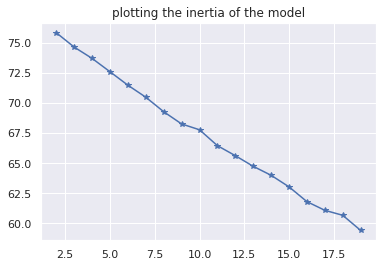

In [36]:
# plot the inertia vs K values
plt.plot(range(2,20),inertia_val,marker='*')
plt.title("plotting the inertia of the model")
#plt.xbin(range(1,20))
plt.show()

## Silhouette Score

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
from sklearn.metrics import silhouette_score
silhouette=[]
for i in range(2,20):
    print("---------------------------------------")
    print(clusters_model[i-2])
    print("Silhouette score:",silhouette_score(csr_mat, clusters_model[i-2].predict(csr_mat)))
    silhouette.append(silhouette_score(csr_mat, clusters_model[i-2].predict(csr_mat)))

---------------------------------------
KMeans(n_clusters=2, random_state=7)
Silhouette score: 0.003980645428074023
---------------------------------------
KMeans(n_clusters=3, random_state=7)
Silhouette score: 0.008547677009335801
---------------------------------------
KMeans(n_clusters=4, random_state=7)
Silhouette score: 0.011813650160863276
---------------------------------------
KMeans(n_clusters=5, random_state=7)
Silhouette score: -0.006011890823033612
---------------------------------------
KMeans(n_clusters=6, random_state=7)
Silhouette score: 0.006081294837022173
---------------------------------------
KMeans(n_clusters=7, random_state=7)
Silhouette score: -0.006706976268347563
---------------------------------------
KMeans(random_state=7)
Silhouette score: 0.008693330612183216
---------------------------------------
KMeans(n_clusters=9, random_state=7)
Silhouette score: 0.013064690943175106
---------------------------------------
KMeans(n_clusters=10, random_state=7)
Silhou

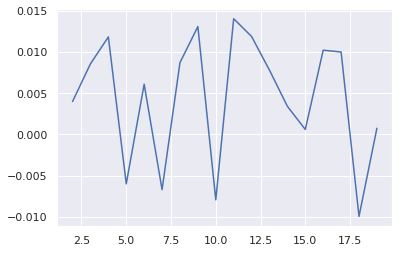

In [39]:
plt.plot(range(2,20),silhouette)

## Taking the optimal Silhouette Score for n_cluster

In [42]:
kmeans = KMeans(n_clusters = 15,random_state=7)
kmeans.fit(csr_mat)
# Calculate the cluster labels: labels
labels = kmeans.predict(csr_mat)
inertia_val.append(kmeans.inertia_)
clusters_model.append(kmeans)
# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'Title': data.Title})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                Title
9       0    Blade Runner 2: The Edge of Human
8       0      Blade Runner 3: Replicant Night
69      1  Rosencrantz & Guildenstern Are Dead
43      1                               Hamlet
81      2                  The Shockwave Rider
..    ...                                  ...
66     11                            Pale Fire
82     12                          The Shining
76     13      Sir Gawain and the Green Knight
4      14                 A Fire Upon the Deep
70     14                            Ringworld

[100 rows x 2 columns]


In [43]:
df.label.value_counts()

2     60
7     18
8      3
14     2
10     2
6      2
5      2
4      2
1      2
0      2
13     1
12     1
11     1
9      1
3      1
Name: label, dtype: int64

# c)Topic modelling

### NMF

In [99]:
from sklearn.decomposition import NMF

In [100]:
tfidf=TfidfVectorizer(stop_words='english')

csr_mat = tfidf.fit_transform(documents)

#tfidf.get_feature_names()

(100, 11293)

In [118]:
# Applying Non-Negative Matrix Factorization
 
nmf = NMF(n_components=10, solver="mu")
model = nmf.fit_transform(csr_mat)
features = nmf.components_



In [119]:
csr_mat.shape

(100, 11293)

In [120]:
model.shape

(100, 10)

In [121]:
features.shape

(10, 11293)

In [122]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(nmf.components_, columns=tfidf.get_feature_names())
components_df

,00,000,10,100,1000,108,11,12,120,13,...,zerubbabel,zeus,zim,zion,zone,zones,zophar,zouch,ægidius,æsir
0,2.693696e-03,6.821287e-03,1.548478e-03,1.199896e-03,1.422040e-02,2.007767e-03,5.392418e-03,1.739311e-03,8.740051e-06,2.586570e-03,...,6.569394e-16,1.003884e-02,7.104299e-11,7.714675e-11,7.274098e-03,2.650416e-03,2.389138e-03,4.170145e-03,0.003430,2.567224e-02
1,0.000000e+00,3.660249e-02,6.186998e-02,0.000000e+00,0.000000e+00,0.000000e+00,4.605764e-02,8.441108e-02,1.473492e-02,2.997923e-02,...,2.828611e-02,0.000000e+00,0.000000e+00,4.483605e-02,0.000000e+00,0.000000e+00,1.111097e-02,0.000000e+00,0.000000,0.000000e+00
2,0.000000e+00,2.418836e-05,6.999329e-10,0.000000e+00,0.000000e+00,0.000000e+00,7.917892e-18,1.255187e-12,4.117977e-04,1.018499e-24,...,0.000000e+00,0.000000e+00,0.000000e+00,1.390149e-28,0.000000e+00,0.000000e+00,1.232524e-26,0.000000e+00,0.000000,0.000000e+00
3,5.355797e-14,0.000000e+00,5.965466e-04,0.000000e+00,1.058159e-03,0.000000e+00,0.000000e+00,4.467241e-09,0.000000e+00,5.862377e-04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.853094e-13,1.908015e-13,0.000000e+00,1.754426e-04,0.000192,1.624736e-03
4,9.245914e-57,7.189723e-04,5.249076e-25,0.000000e+00,6.424329e-54,0.000000e+00,0.000000e+00,0.000000e+00,4.221817e-11,1.729642e-04,...,2.338578e-100,0.000000e+00,1.317595e-75,6.919358e-04,0.000000e+00,9.263991e-28,6.956441e-04,6.852189e-62,0.000000,0.000000e+00
5,7.372992e-06,2.461621e-24,1.175700e-03,0.000000e+00,6.395031e-12,6.682243e-20,2.240446e-03,0.000000e+00,1.149087e-24,1.240632e-03,...,9.427027e-04,3.341122e-19,2.245920e-03,4.399037e-03,2.875120e-18,1.436877e-03,2.126222e-29,5.259461e-45,0.000767,1.673919e-122
6,1.351356e-05,8.618353e-03,5.066599e-03,7.396664e-03,0.000000e+00,0.000000e+00,2.091233e-03,1.900198e-03,5.907501e-25,1.131117e-04,...,4.952740e-161,0.000000e+00,7.002635e-20,3.849705e-03,3.560841e-02,9.127740e-03,0.000000e+00,0.000000e+00,0.000000,4.988280e-20
7,4.760564e-03,0.000000e+00,1.477844e-02,1.467547e-13,0.000000e+00,0.000000e+00,1.049857e-02,5.400742e-03,0.000000e+00,0.000000e+00,...,2.184746e-02,0.000000e+00,2.475296e-02,3.272217e-10,1.078076e-09,1.012890e-02,0.000000e+00,0.000000e+00,0.000000,1.190402e-17
8,0.000000e+00,5.076634e-20,0.000000e+00,0.000000e+00,0.000000e+00,2.578132e-09,0.000000e+00,0.000000e+00,1.963217e-13,1.987133e-62,...,0.000000e+00,1.289066e-08,1.576259e-06,2.784677e-58,5.503273e-27,6.081757e-25,4.484134e-21,0.000000e+00,0.000000,0.000000e+00
9,0.000000e+00,0.000000e+00,4.362476e-05,0.000000e+00,0.000000e+00,4.254385e-05,1.071026e-06,0.000000e+00,6.146523e-52,2.647583e-04,...,9.965471e-04,2.127193e-04,1.407659e-49,1.139564e-03,0.000000e+00,2.217149e-43,0.000000e+00,4.214345e-25,0.013679,7.626150e-12


In [124]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
king     0.185422
john     0.155515
mr       0.145460
town     0.142885
lady     0.123528
tells    0.123429
alice    0.121518
court    0.120304
huck     0.120014
jack     0.119823
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
god           0.743918
moses         0.478215
israel        0.284110
israelites    0.269212
chapters      0.215639
yahweh        0.183030
land          0.182262
joshua        0.168511
jonah         0.162084
ndash         0.141981
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
bene        0.500106
gesserit    0.451924
honored     0.394562
matres      0.343265
teg         0.315330
odrade      0.313402
murbella    0.217309
lucilla     0.207116
taraza      0.195265
sheeana     0.183754
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
hamlet          0.828794
guildenstern    0.356688
rosencrantz     0.317006
claudius        0.256804
pl